# Coffee Shop Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


First, import the data.

In [2]:
df = pd.read_csv('/kaggle/input/coffee-shop-sales-analysis/Project.csv')
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


In [3]:
#columns in the dataset
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time', 'store_id',
       'store_location', 'product_id', 'transaction_qty', 'unit_price',
       'Total_Bill', 'product_category', 'product_type', 'product_detail',
       'Size', 'Month Name', 'Day Name', 'Hour', 'Month', 'Day of Week'],
      dtype='object')

In [4]:
#The data types of each column in the dataset
df.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
store_id              int64
store_location       object
product_id            int64
transaction_qty       int64
unit_price          float64
Total_Bill          float64
product_category     object
product_type         object
product_detail       object
Size                 object
Month Name           object
Day Name             object
Hour                  int64
Month                 int64
Day of Week           int64
dtype: object

In [5]:
df.describe()

,transaction_id,store_id,product_id,transaction_qty,unit_price,Total_Bill,Hour,Month,Day of Week
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,5.342063,47.918607,1.438276,3.382219,4.686367,11.735790,3.988881,2.982336
std,43153.600016,2.074241,17.930020,0.542509,2.658723,4.227099,3.764662,1.673091,1.996650
min,1.000000,3.000000,1.000000,1.000000,0.800000,0.800000,6.000000,1.000000,0.000000
25%,37335.750000,3.000000,33.000000,1.000000,2.500000,3.000000,9.000000,3.000000,1.000000
50%,74727.500000,5.000000,47.000000,1.000000,3.000000,3.750000,11.000000,4.000000,3.000000
75%,112094.250000,8.000000,60.000000,2.000000,3.750000,6.000000,15.000000,5.000000,5.000000
max,149456.000000,8.000000,87.000000,8.000000,45.000000,360.000000,20.000000,6.000000,6.000000


In [6]:
#Checking if any column contain null values
df.isnull().any()

transaction_id      False
transaction_date    False
transaction_time    False
store_id            False
store_location      False
product_id          False
transaction_qty     False
unit_price          False
Total_Bill          False
product_category    False
product_type        False
product_detail      False
Size                False
Month Name          False
Day Name            False
Hour                False
Month               False
Day of Week         False
dtype: bool

# Stores

In [7]:
df['store_id'].unique()

array([3, 5, 8])

In [8]:
df['store_location'].unique()

array(['Astoria', 'Lower Manhattan', "Hell's Kitchen"], dtype=object)

In [9]:
df['transaction_id'].count()

149116

In [10]:
df['store_location'].value_counts()

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

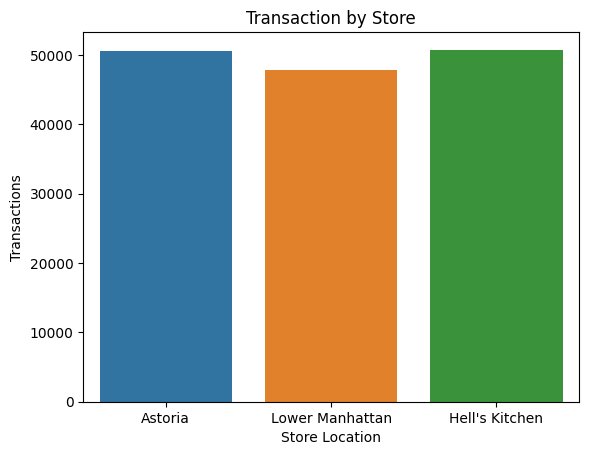

In [11]:
sns.countplot(df, x = 'store_location')
plt.xlabel('Store Location')
plt.ylabel('Transactions')
plt.title('Transaction by Store')
plt.show()

<Axes: xlabel='Month Name', ylabel='count'>

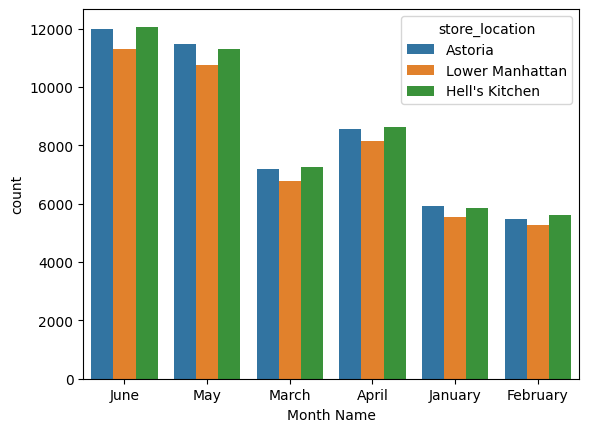

In [12]:
sns.countplot(df, x = 'Month Name', hue = 'store_location')

In [13]:
df['product_id'].nunique()

80

In [14]:
df['product_id'].value_counts()

product_id
71    3076
50    3053
59    3029
54    3026
29    3013
      ... 
7      146
14     142
10     134
18     122
19     118
Name: count, Length: 80, dtype: int64

In [15]:
df['product_category'].nunique()

9

In [16]:
df['product_category'].value_counts()

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

In [17]:
df['product_type'].nunique()

29

In [18]:
df['product_type'].value_counts()

product_type
Brewed Chai tea          17183
Gourmet brewed coffee    16912
Barista Espresso         16403
Hot chocolate            11468
Brewed Black tea         11350
Brewed herbal tea        11245
Scone                    10173
Organic brewed coffee     8489
Drip coffee               8477
Premium brewed coffee     8135
Pastry                    6912
Biscotti                  5711
Brewed Green tea          5671
Regular syrup             4979
Sugar free syrup          1811
Housewares                 526
Chai tea                   443
Organic Beans              415
Gourmet Beans              366
Premium Beans              336
Espresso Beans             319
Herbal tea                 305
Black tea                  303
Drinking Chocolate         266
Organic Chocolate          221
Clothing                   221
House blend Beans          183
Green tea                  159
Green beans                134
Name: count, dtype: int64

In [19]:
df_id = df[['product_id', 'product_category','unit_price','product_type']].drop_duplicates()
df_id.groupby('product_category').count()
df_id.sort_values(by='product_id', ascending = True, inplace=True)
df_id = df_id.reset_index(drop=True)
df_id

,product_id,product_category,unit_price,product_type
0,1,Coffee beans,18.00,Organic Beans
1,2,Coffee beans,18.00,House blend Beans
2,3,Coffee beans,14.75,Espresso Beans
3,4,Coffee beans,20.45,Espresso Beans
4,5,Coffee beans,15.00,Gourmet Beans
...,...,...,...,...
93,83,Branded,23.00,Housewares
94,83,Branded,14.00,Housewares
95,84,Flavours,0.80,Regular syrup
96,87,Coffee,3.00,Barista Espresso


In [20]:
for product in df['product_category'].unique():
    df1 = df_id[df_id['product_category']== product]
    min = df1['unit_price'].min()
    max = df1['unit_price'].max()
    avg = round(df1['unit_price'].mean(),2)
    print(f"Cheapest price of {product} is: {min} \nMost expensive price of {product} is: {max} \nAverage cost of {product} is: {avg}\n")

Cheapest price of Tea is: 2.5 
Most expensive price of Tea is: 4.0 
Average cost of Tea is: 2.82

Cheapest price of Coffee is: 2.0 
Most expensive price of Coffee is: 4.25 
Average cost of Coffee is: 2.99

Cheapest price of Bakery is: 2.65 
Most expensive price of Bakery is: 5.63 
Average cost of Bakery is: 3.94

Cheapest price of Drinking Chocolate is: 3.5 
Most expensive price of Drinking Chocolate is: 4.75 
Average cost of Drinking Chocolate is: 4.12

Cheapest price of Flavours is: 0.8 
Most expensive price of Flavours is: 0.8 
Average cost of Flavours is: 0.8

Cheapest price of Loose Tea is: 8.95 
Most expensive price of Loose Tea is: 10.95 
Average cost of Loose Tea is: 9.31

Cheapest price of Packaged Chocolate is: 6.4 
Most expensive price of Packaged Chocolate is: 13.33 
Average cost of Packaged Chocolate is: 9.11

Cheapest price of Branded is: 12.0 
Most expensive price of Branded is: 28.0 
Average cost of Branded is: 20.5

Cheapest price of Coffee beans is: 10.0 
Most expensi

In [21]:
df.groupby(df['product_type']).count().sort_values(by='transaction_id', ascending=False)

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
product_type,,,,,,,,,,,,,,,,,
Brewed Chai tea,17183,17183,17183,17183,17183,17183,17183,17183,17183,17183,17183,17183,17183,17183,17183,17183,17183
Gourmet brewed coffee,16912,16912,16912,16912,16912,16912,16912,16912,16912,16912,16912,16912,16912,16912,16912,16912,16912
Barista Espresso,16403,16403,16403,16403,16403,16403,16403,16403,16403,16403,16403,16403,16403,16403,16403,16403,16403
Hot chocolate,11468,11468,11468,11468,11468,11468,11468,11468,11468,11468,11468,11468,11468,11468,11468,11468,11468
Brewed Black tea,11350,11350,11350,11350,11350,11350,11350,11350,11350,11350,11350,11350,11350,11350,11350,11350,11350
Brewed herbal tea,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245
Scone,10173,10173,10173,10173,10173,10173,10173,10173,10173,10173,10173,10173,10173,10173,10173,10173,10173
Organic brewed coffee,8489,8489,8489,8489,8489,8489,8489,8489,8489,8489,8489,8489,8489,8489,8489,8489,8489
Drip coffee,8477,8477,8477,8477,8477,8477,8477,8477,8477,8477,8477,8477,8477,8477,8477,8477,8477


In [22]:
month_dict={1:'Januray', 2:'Febuary', 3:'March', 4:'April', 5:'May', 6:'June'}

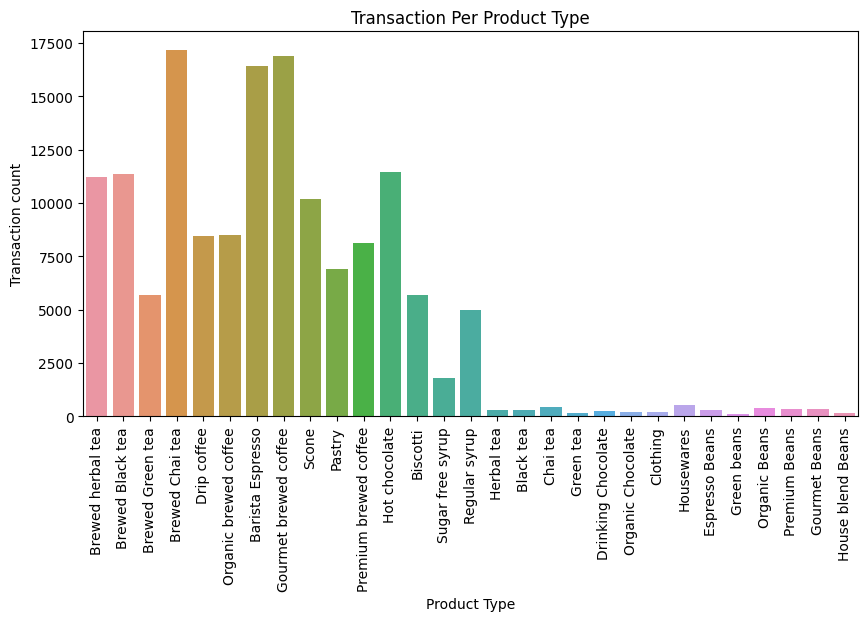

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df, x='product_type')
plt.title('Transaction Per Product Type')
plt.xlabel('Product Type')
plt.ylabel('Transaction count')
plt.xticks(rotation=90)
plt.show()

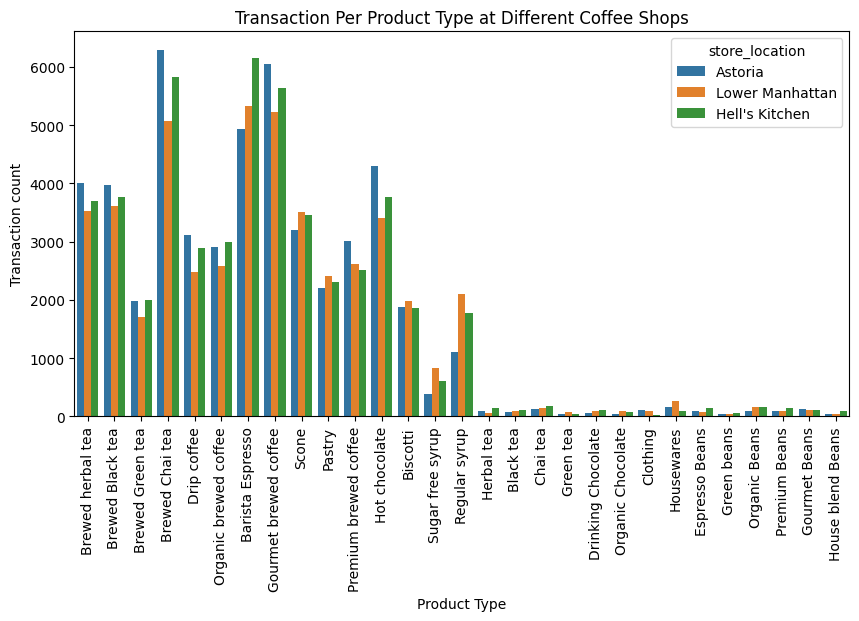

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df, x='product_type', hue='store_location')
plt.title('Transaction Per Product Type at Different Coffee Shops')
plt.xlabel('Product Type')
plt.ylabel('Transaction count')
plt.xticks(rotation=90)
plt.show()

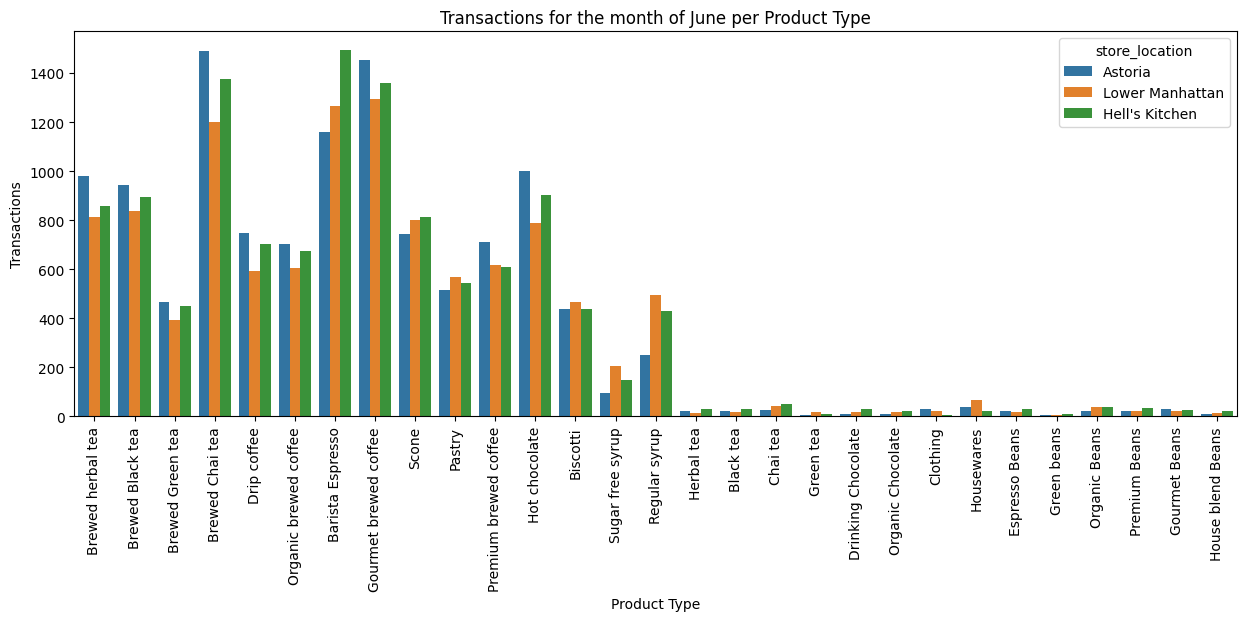

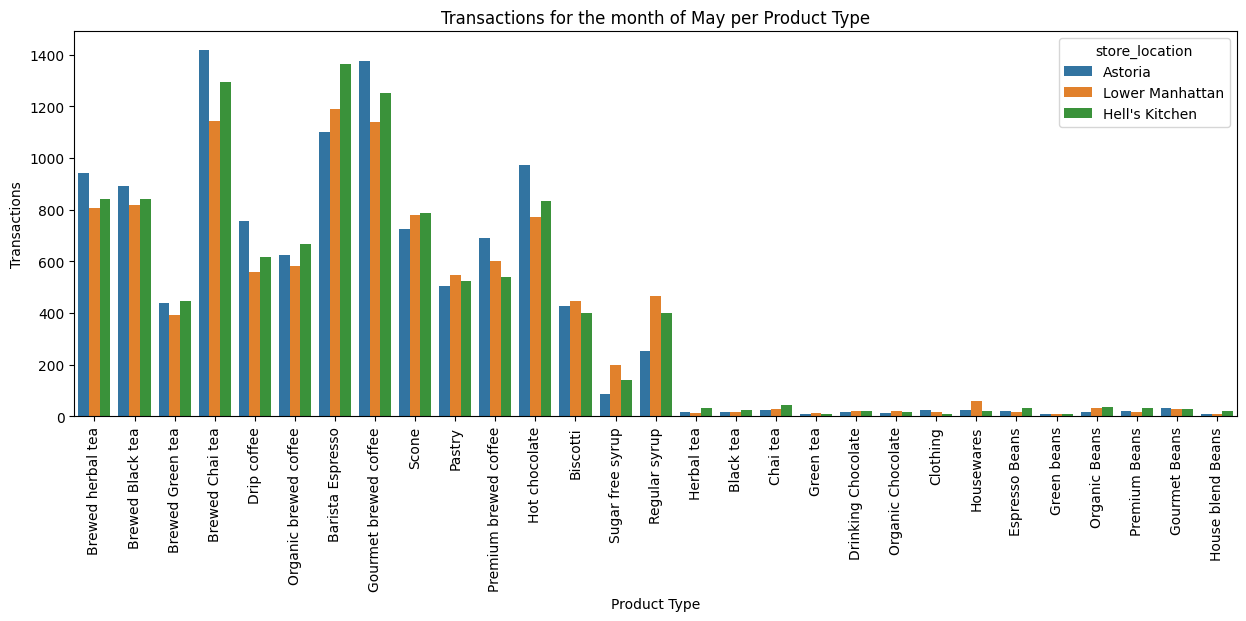

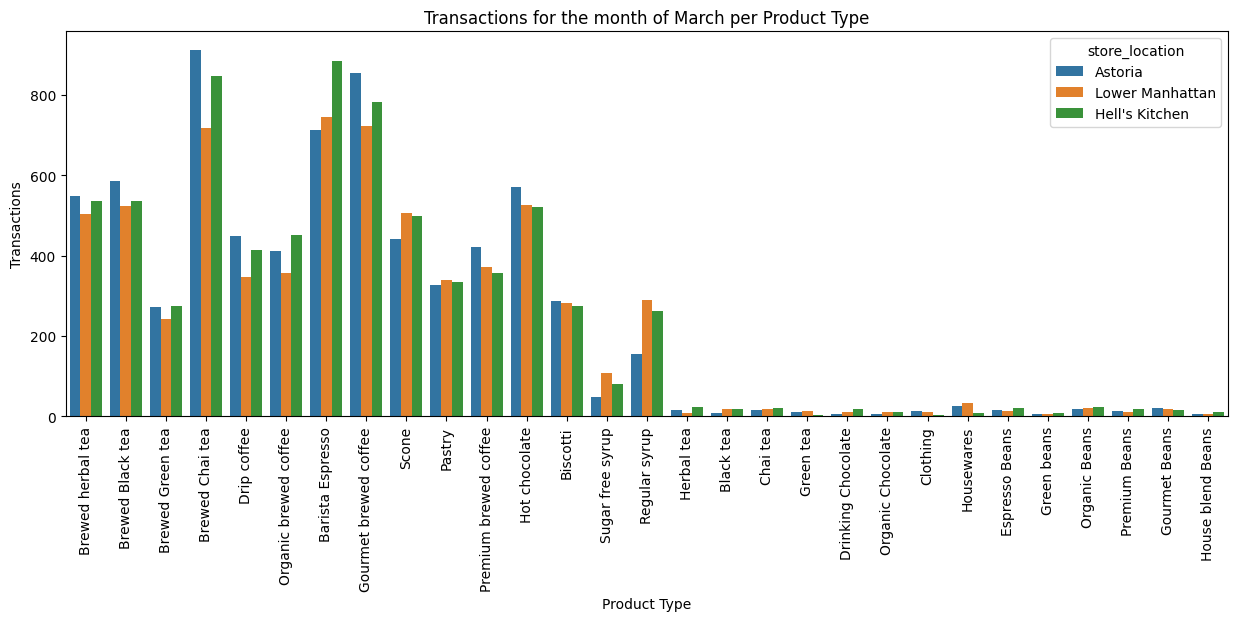

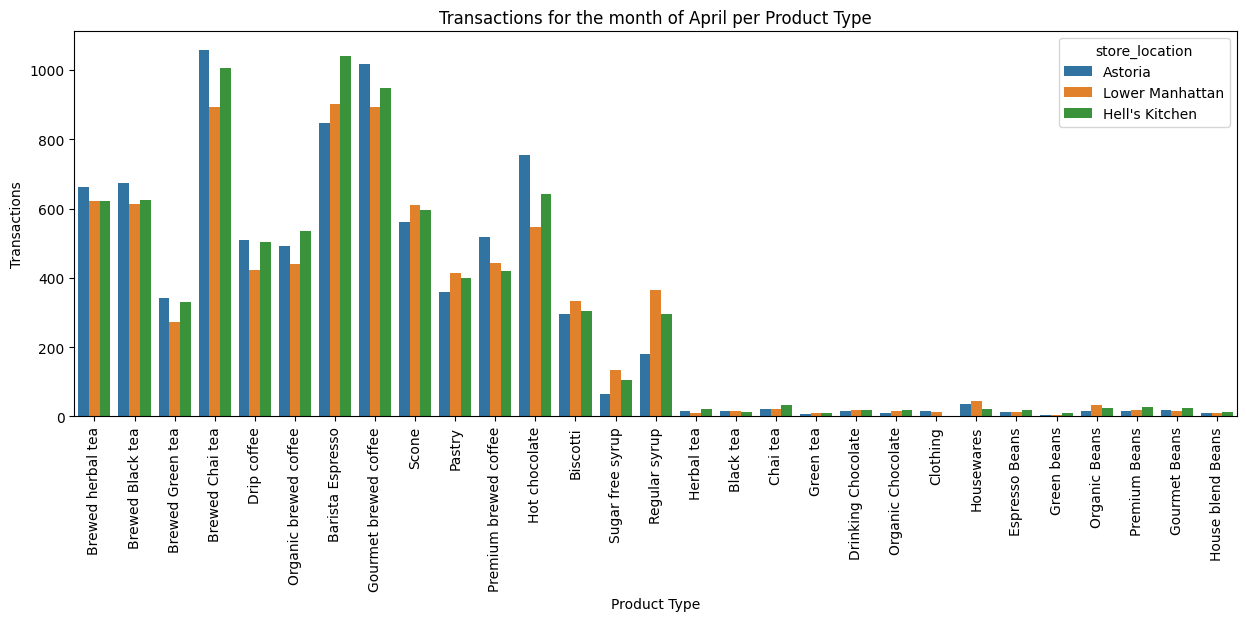

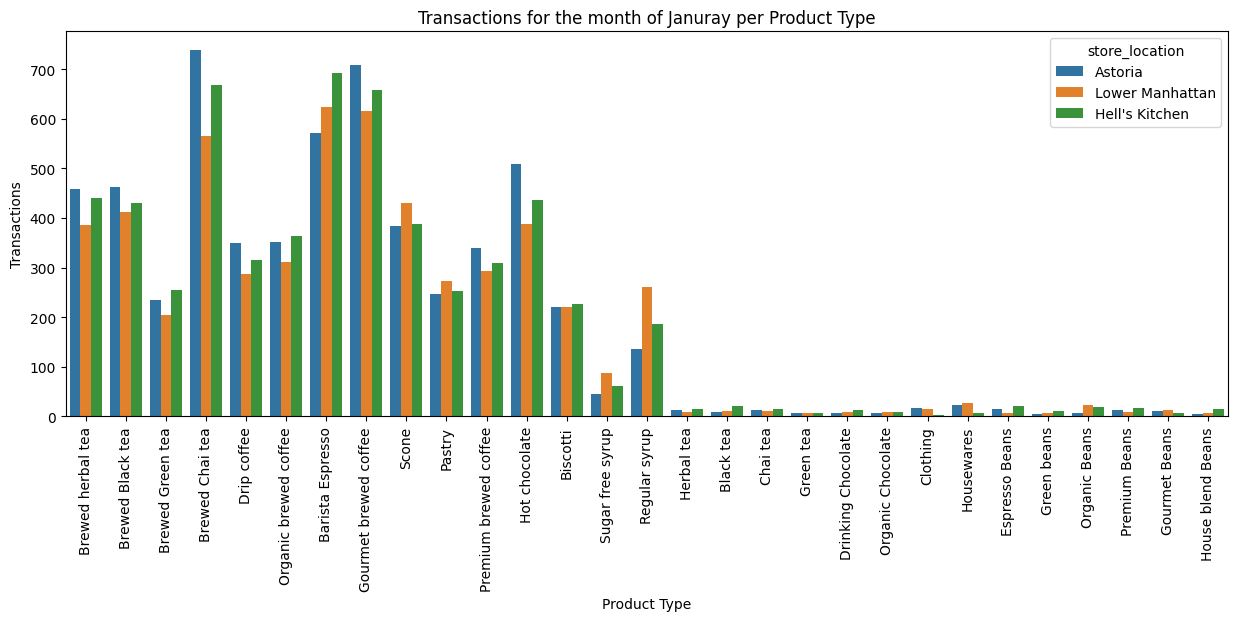

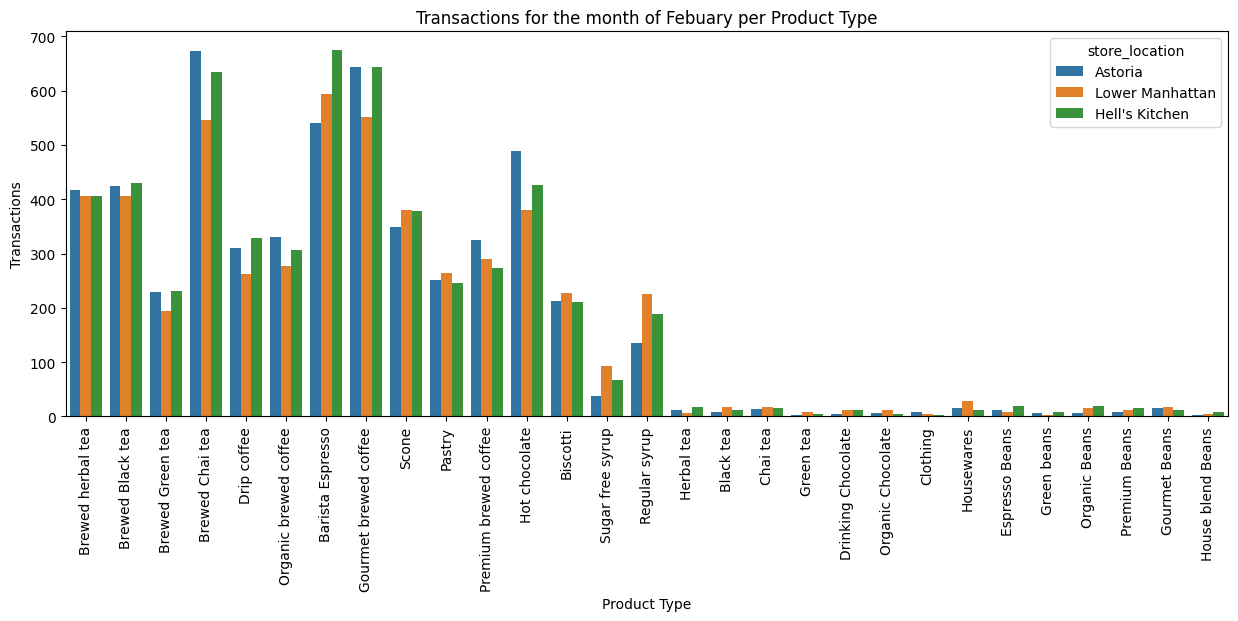

In [25]:
for each in df['Month'].unique():
    df_mon = df[df["Month"] == each]
    fig, ax = plt.subplots(figsize=(15,5))
    sns.countplot(df_mon, x='product_type', hue='store_location')
    plt.title(f'Transactions for the month of {month_dict[each]} per Product Type')
    plt.ylabel('Transactions')
    plt.xlabel('Product Type')
    plt.xticks(rotation=90)
    plt.show()

In [26]:
df.groupby([df['product_category'], df['store_location']]).count()

transaction_id  transaction_date  \
product_category   store_location                                      
Bakery             Astoria                    7289              7289   
                   Hell's Kitchen             7617              7617   
                   Lower Manhattan            7890              7890   
Branded            Astoria                     279               279   
                   Hell's Kitchen              119               119   
                   Lower Manhattan             349               349   
Coffee             Astoria                   20025             20025   
                   Hell's Kitchen            20187             20187   
                   Lower Manhattan           18204             18204   
Coffee beans       Astoria                     502               502   
                   Hell's Kitchen              720               720   
                   Lower Manhattan             531               531   
Drinking Chocolate Astoria                    4300              4300   
                   Hell's Kitchen             3763              3763   
                   Lower Manhattan            3405              3405   
Flavours           Astoria                    1490              1490   
                   Hell's Kitchen             2370              2370   
                   Lower Manhattan            2930              2930   
Loose Tea          Astoria                     344               344   
                   Hell's Kitchen              485               485   
                   Lower Manhattan             381               381   
Packaged Chocolate Astoria                     110               110   
                   Hell's Kitchen              197               197   
                   Lower Manhattan             180               180   
Tea                Astoria                   16260             16260   
                   Hell's Kitchen            15277             15277   
                   Lower Manhattan           13912             13912   

                                    transaction_time  store_id  product_id  \
product_category   store_location                                            
Bakery             Astoria                      7289      7289        7289   
                   Hell's Kitchen               7617      7617        7617   
                   Lower Manhattan              7890      7890        7890   
Branded            Astoria                       279       279         279   
                   Hell's Kitchen                119       119         119   
                   Lower Manhattan               349       349         349   
Coffee             Astoria                     20025     20025       20025   
                   Hell's Kitchen              20187     20187       20187   
                   Lower Manhattan             18204     18204       18204   
Coffee beans       Astoria                       502       502         502   
                   Hell's Kitchen                720       720         720   
                   Lower Manhattan               531       531         531   
Drinking Chocolate Astoria                      4300      4300        4300   
                   Hell's Kitchen               3763      3763        3763   
                   Lower Manhattan              3405      3405        3405   
Flavours           Astoria                      1490      1490        1490   
                   Hell's Kitchen               2370      2370        2370   
                   Lower Manhattan              2930      2930        2930   
Loose Tea          Astoria                       344       344         344   
                   Hell's Kitchen                485       485         485   
                   Lower Manhattan               381       381         381   
Packaged Chocolate Astoria                       110       110         110   
                   Hell's Kitchen                197       197         197 

Text(0, 0.5, 'Transaction count')

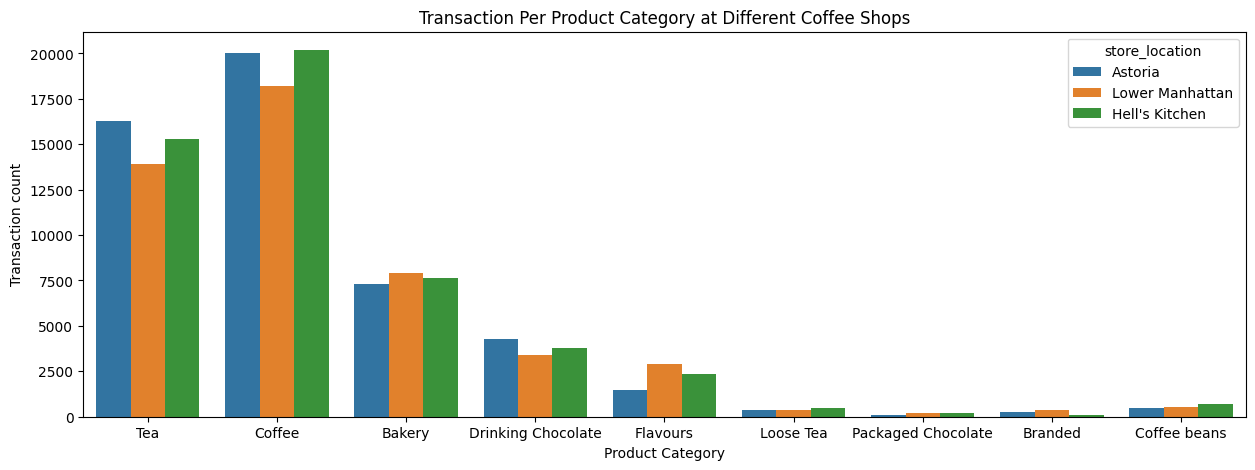

In [27]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(df, x = 'product_category', hue = 'store_location')
plt.title('Transaction Per Product Category at Different Coffee Shops')
plt.xlabel('Product Category')
plt.ylabel('Transaction count')

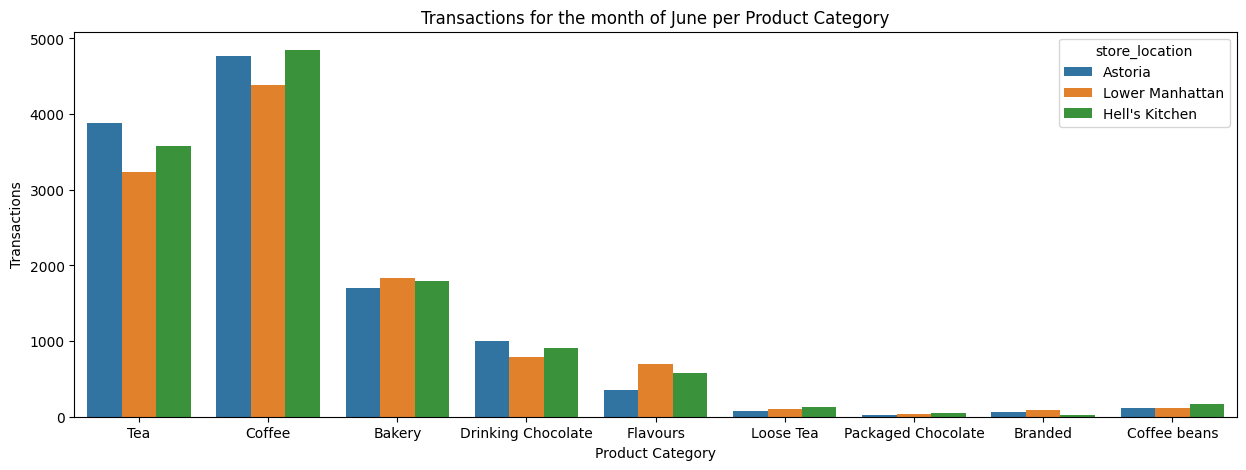

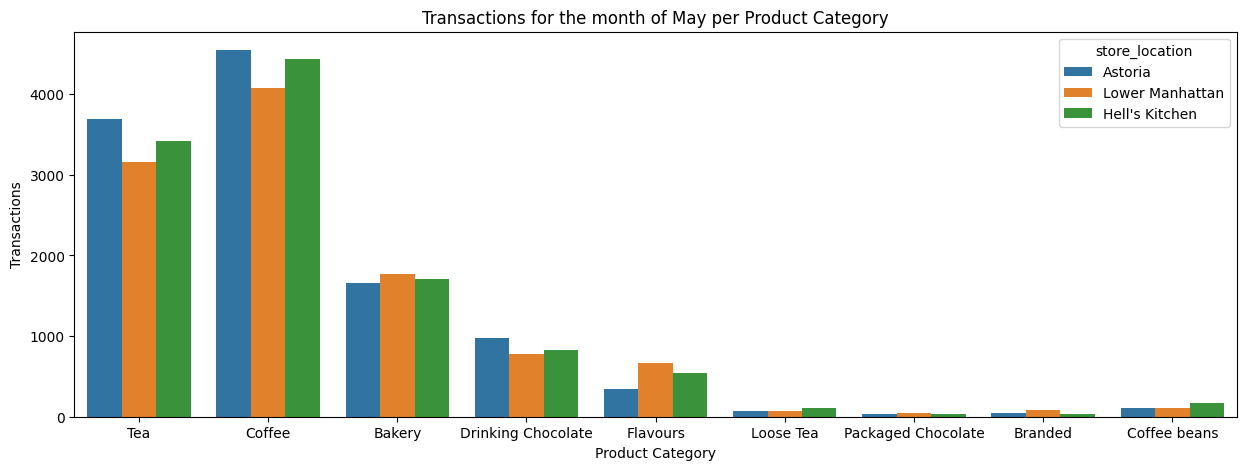

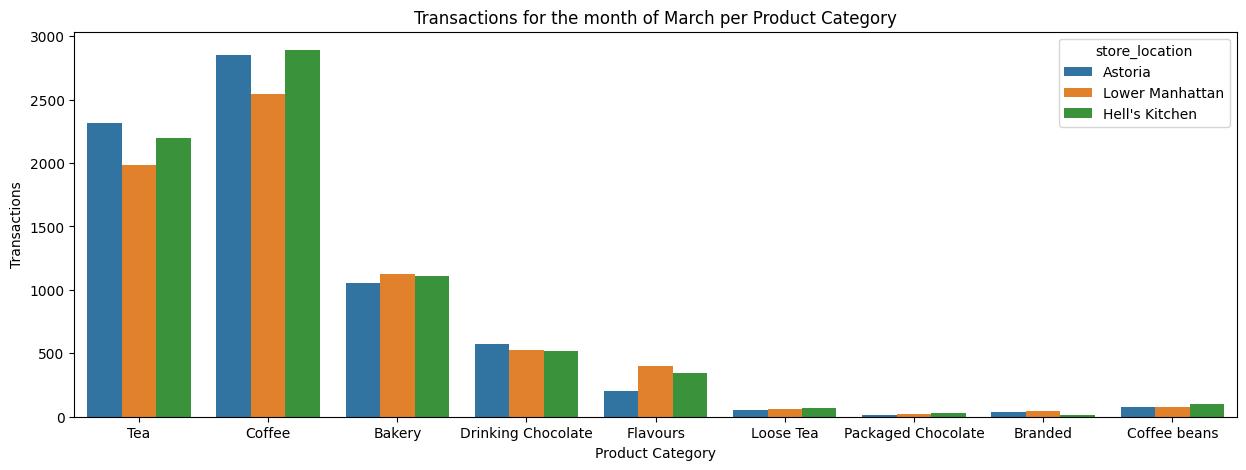

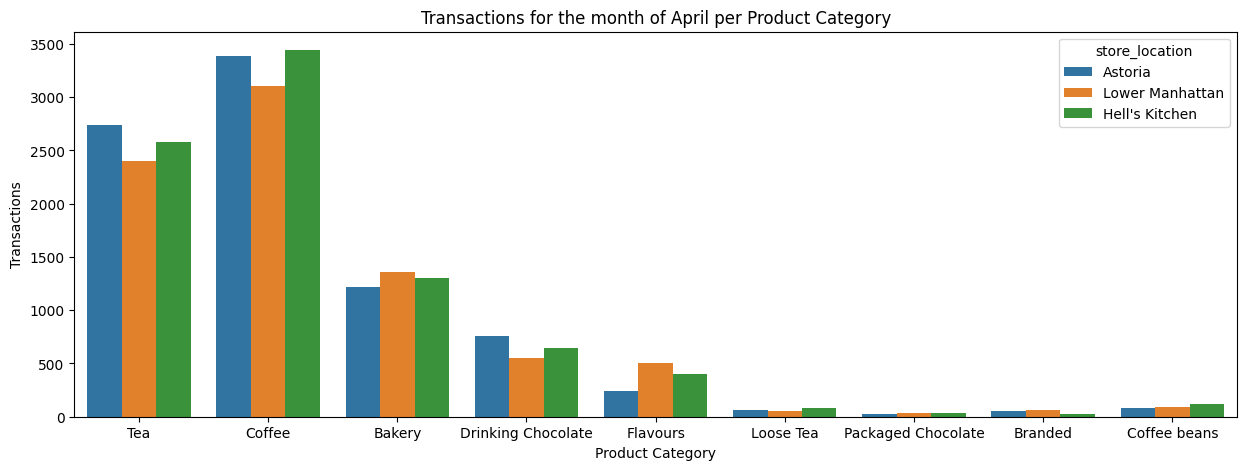

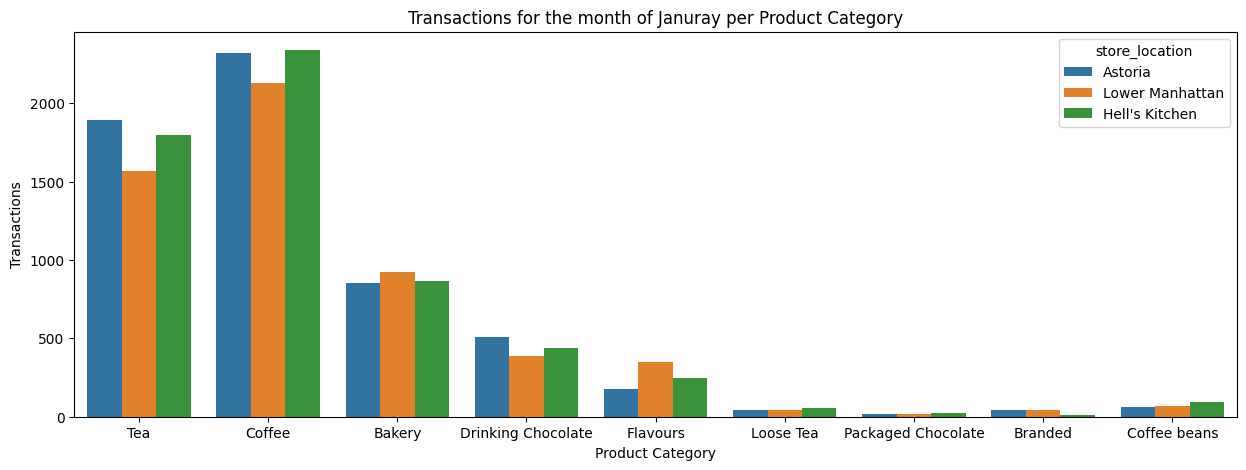

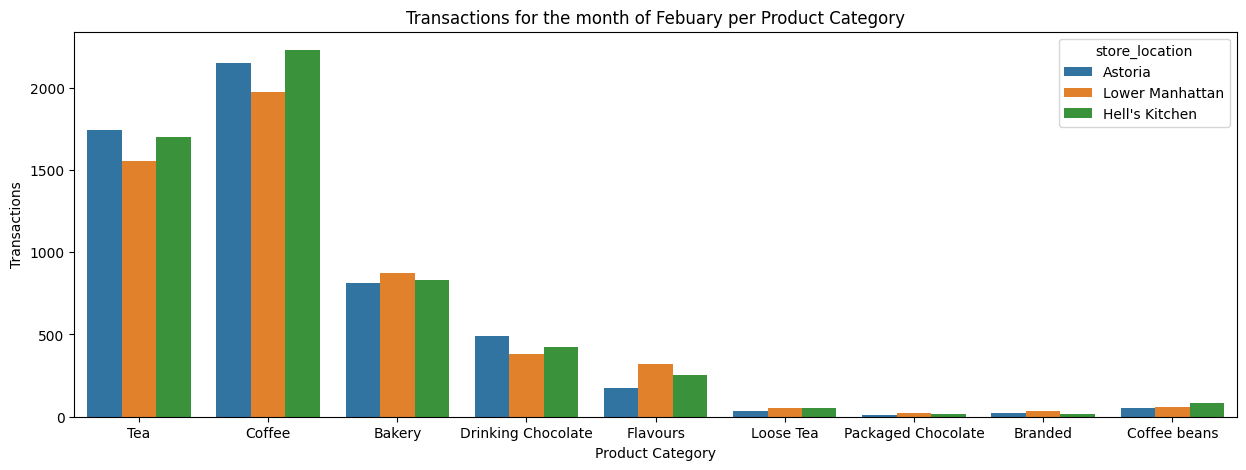

In [28]:
for each in df['Month'].unique():
    df_mon = df[df["Month"] == each]
    fig, ax = plt.subplots(figsize=(15,5))
    sns.countplot(df_mon, x = 'product_category', hue = 'store_location')
    plt.title(f'Transactions for the month of {month_dict[each]} per Product Category')
    plt.ylabel('Transactions')
    plt.xlabel('Product Category')
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text

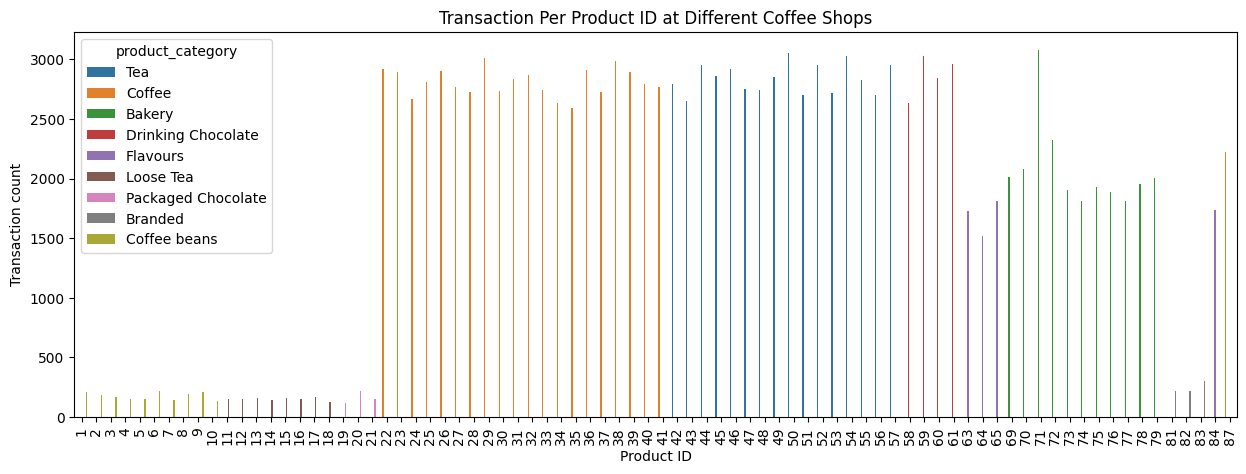

In [29]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(df, x='product_id', hue='product_category')
plt.title('Transaction Per Product ID at Different Coffee Shops')
plt.xlabel('Product ID')
plt.ylabel('Transaction count')
plt.xticks(rotation=90)

In [30]:
bsp_month_dict= {}

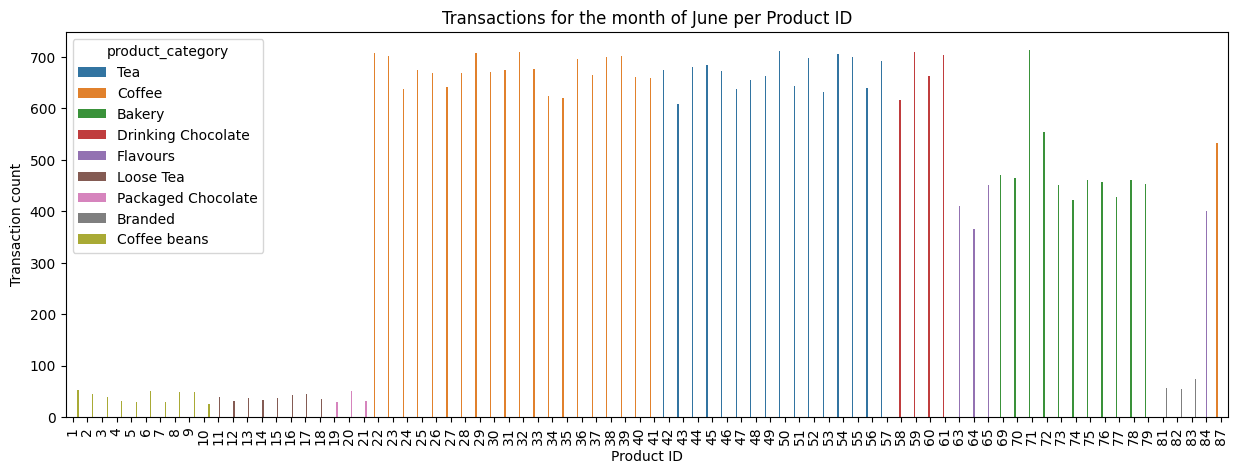

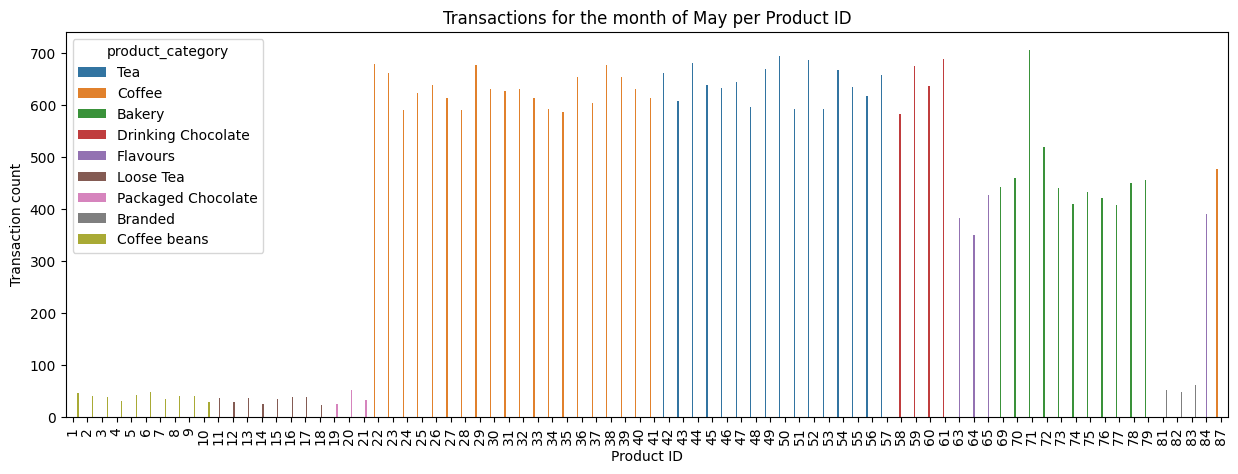

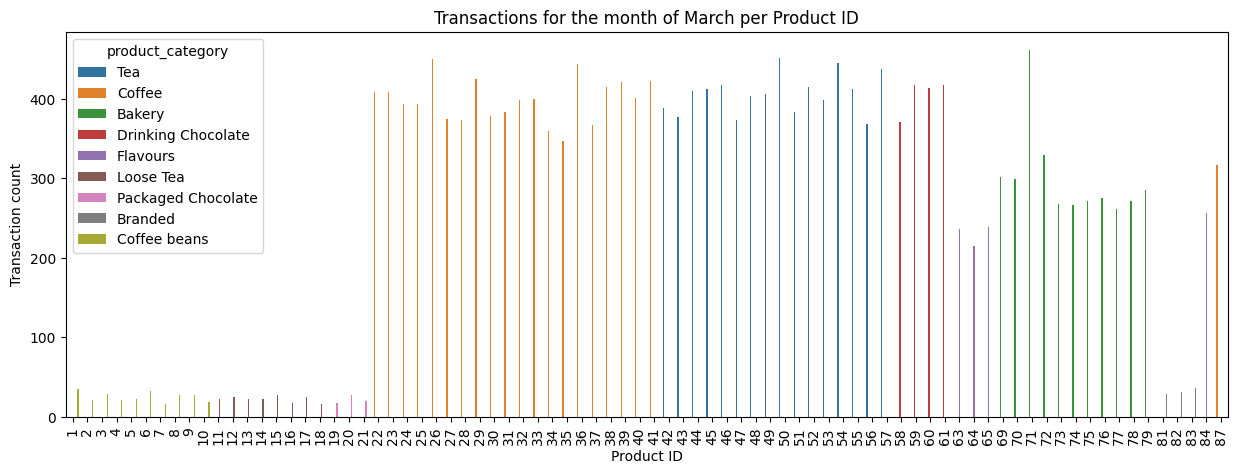

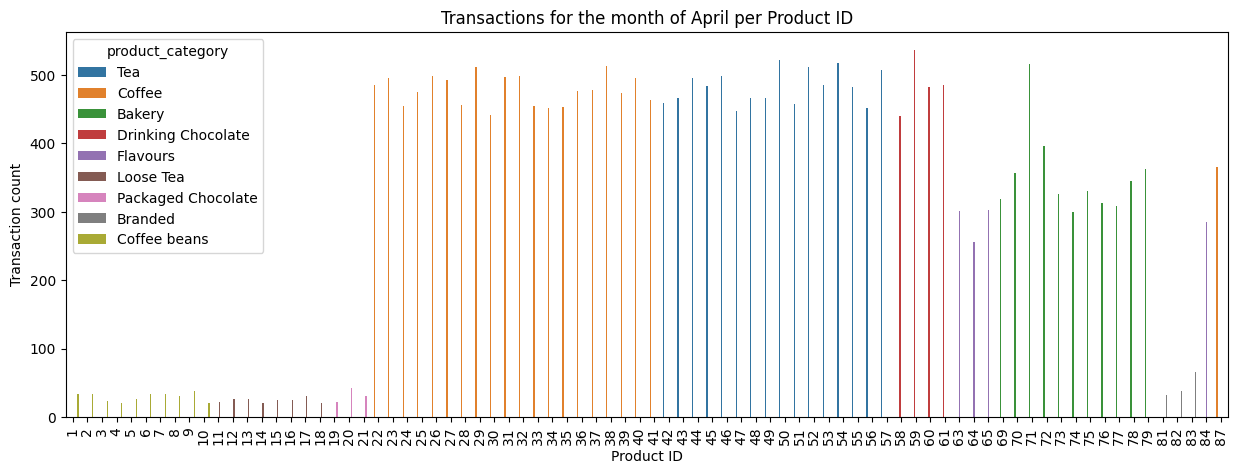

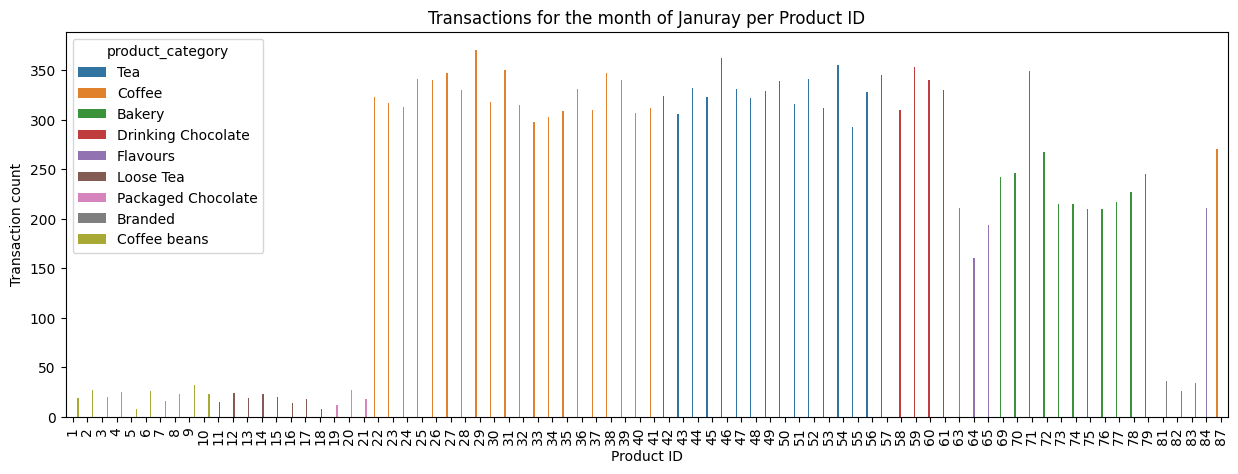

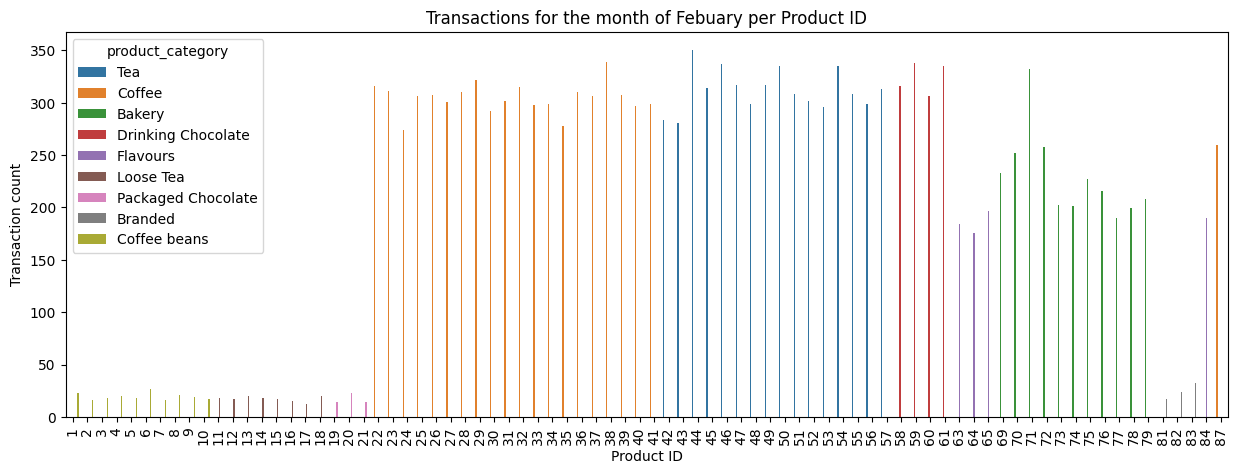

In [31]:
for each in df['Month'].unique():
    df_mon = df[df["Month"] == each]
    bsp_month_dict[each] = df_mon['product_id'].value_counts()[:3]
    fig, ax = plt.subplots(figsize=(15,5))
    sns.countplot(df_mon, x = 'product_id', hue = 'product_category')
    plt.title(f'Transactions for the month of {month_dict[each]} per Product ID')
    plt.xlabel('Product ID')
    plt.ylabel('Transaction count')
    plt.xticks(rotation=90)
    plt.show()

In [32]:
bsp_month_dict
sorted(bsp_month_dict.items())

[(1,
  product_id
  29    370
  46    362
  54    355
  Name: count, dtype: int64),
 (2,
  product_id
  44    350
  38    339
  59    338
  Name: count, dtype: int64),
 (3,
  product_id
  71    461
  50    451
  26    450
  Name: count, dtype: int64),
 (4,
  product_id
  59    536
  50    522
  54    517
  Name: count, dtype: int64),
 (5,
  product_id
  71    705
  50    695
  61    688
  Name: count, dtype: int64),
 (6,
  product_id
  71    713
  50    711
  59    710
  Name: count, dtype: int64)]

<Axes: xlabel='transaction_qty', ylabel='count'>

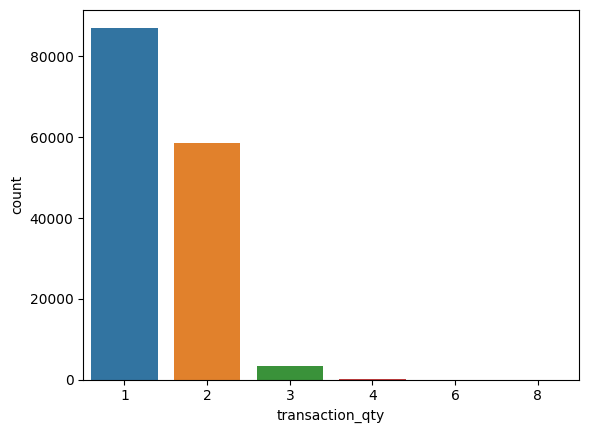

In [33]:
sns.countplot(df, x='transaction_qty')

In [34]:
df['transaction_qty'].value_counts()/df['transaction_qty'].count()
pd.concat([df['transaction_qty'].value_counts(), df['transaction_qty'].value_counts()/df['transaction_qty'].count() * 100], axis=1, keys=['Count', 'Percent'])

,Count,Percent
transaction_qty,,
1,87159,58.450468
2,58642,39.326430
3,3279,2.198959
4,23,0.015424
8,10,0.006706
6,3,0.002012


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total_Bill', ylabel='Count'>

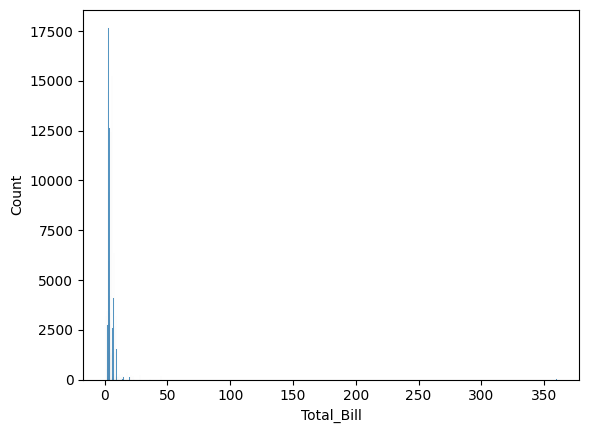

In [35]:
sns.histplot(df, x='Total_Bill')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total_Bill', ylabel='Count'>

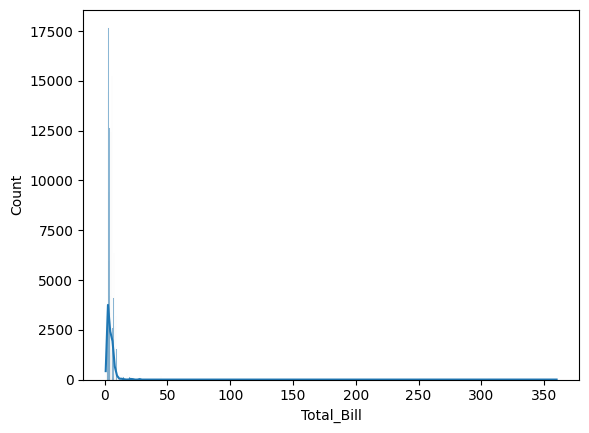

In [36]:
sns.histplot(df, x='Total_Bill', kde=True)

In [37]:
df_bill = df.query('Total_Bill < 72')
df_bill.max()

transaction_id                      149456
transaction_date                31-05-2023
transaction_time                  20:59:32
store_id                                 8
store_location             Lower Manhattan
product_id                              87
transaction_qty                          4
unit_price                            45.0
Total_Bill                            56.0
product_category                       Tea
product_type              Sugar free syrup
product_detail      Traditional Blend Chai
Size                                 Small
Month Name                             May
Day Name                         Wednesday
Hour                                    20
Month                                    6
Day of Week                              6
dtype: object

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total_Bill', ylabel='Count'>

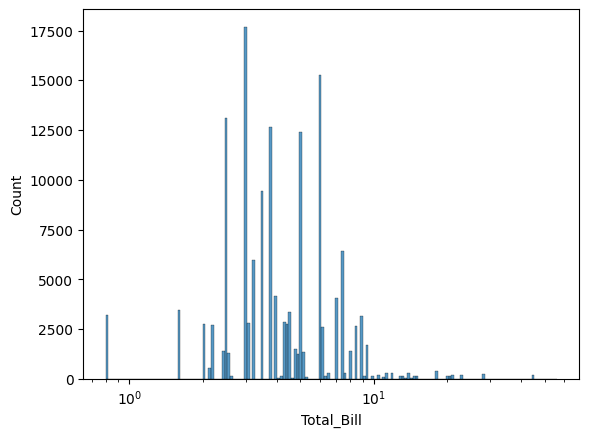

In [38]:
sns.histplot(df_bill, x='Total_Bill',log_scale=True)

<Axes: xlabel='Day Name', ylabel='count'>

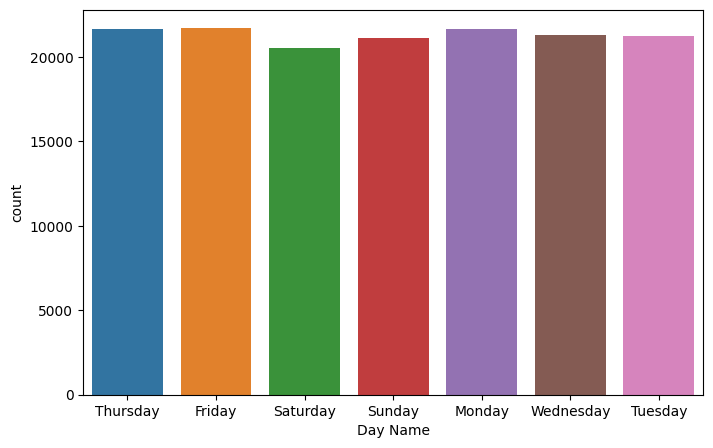

In [39]:
ax, fig = plt.subplots(figsize=(8,5))
sns.countplot(df, x = 'Day Name')

<Axes: xlabel='Hour', ylabel='count'>

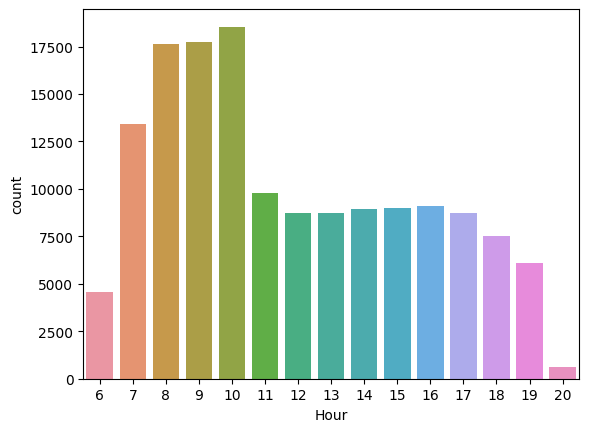

In [40]:
sns.countplot(df, x = 'Hour')

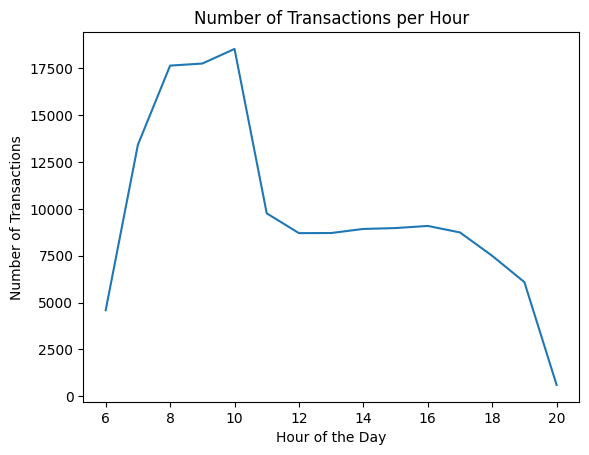

In [41]:
df.groupby('Hour').size().plot()
plt.title('Number of Transactions per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()